In [1]:
import numpy as np
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq

In [2]:
def transform(x):
    return np.sign(x) * np.log(np.abs(x) + 1)

In [3]:
def transform_inv(x):
    return np.sign(x) * (np.exp(np.abs(x)) - 1)

In [112]:
t = np.array([0,3,5,2,7,2,7])
t[np.where(t > 3)]

array([5, 7, 7])

In [101]:
df2 = pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]),
                columns=['a', 'b', 'c'])

In [108]:
list(df2.columns).index('a')

0

In [28]:
table = pq.read_table('data/train_trx.parquet')
df = table.to_pandas()
np_data = df.to_numpy()


tr_amounts_by_value = {}
for i in range(len(df)):
    tr_types_ = np_data[i][4]
    tr_amounts_ = transform_inv(np_data[i][1])
    for ix_, j in enumerate(tr_types_):
        if j in tr_amounts_by_value:
            tr_amounts_by_value[j] += tr_amounts_[ix_]
        else:
            tr_amounts_by_value[j] = tr_amounts_[ix_]

amounts_by_val_sorted = sorted(tr_amounts_by_value.items(),
                            key = lambda x: abs(x[1]), reverse = True)

negative_items = []
positive_items = []
for pair in amounts_by_val_sorted:
    if pair[1] >= 0:
        positive_items += [pair[0]]
    else:
        negative_items += [pair[0]]

In [4]:
import pickle

with open(r"data/top_negative_items.pkl", "rb") as f:
    top_n = pickle.load(f)

with open(r"data/top_positive_items.pkl", "rb") as f:
    top_p = pickle.load(f)
    
print(len(top_n))
print(top_n)
print()
print(len(top_p))
print(top_p)

49
[2010, 2370, 1010, 1110, 2330, 2371, 2011, 2020, 2331, 1100, 1030, 1200, 1210, 2210, 2021, 2110, 2340, 2440, 2460, 2320, 4010, 4071, 2341, 2456, 4051, 1310, 1410, 4110, 2100, 2200, 4011, 1000, 4210, 2446, 1510, 4020, 4500, 4041, 4090, 4031, 4021, 4097, 4100, 4061, 2000, 4200, 4096, 4045, 4035]

28
[7070, 7010, 7030, 7071, 7020, 7021, 7031, 7011, 6110, 7014, 7074, 7040, 7034, 7041, 6210, 6010, 7024, 6100, 7075, 6200, 7035, 7015, 7025, 6000, 8100, 8145, 7044, 8146]


In [31]:
negative_items

[3,
 7,
 2,
 5,
 13,
 16,
 14,
 24,
 19,
 10,
 4,
 12,
 21,
 31,
 46,
 27,
 55,
 39,
 33,
 30,
 18,
 15,
 67,
 20,
 45,
 41,
 40,
 58,
 28,
 69,
 25,
 68,
 34,
 62,
 72,
 52,
 51,
 43,
 42,
 47,
 60,
 48,
 56,
 66,
 77,
 71,
 63,
 75,
 76]

In [5]:
!ls 

'Distribution check. Inference..ipynb'	 models
'Distribution targets.ipynb'		 my_config_for_jupyter.pickle
 README.md				 my_config_for_jupyter_model.pickle
 bin					 notebooks
 conf					 old_data
 data					 results
 distribution_target.py			 scenario_gender
 lightning_logs


In [ ]:
table = pq.read_table('/mnt/ildar/tmp_trans_collect_with_target')
df = table.to_pandas()

In [ ]:
df.to_numpy().shape

In [6]:
!ls

'Distribution check. Inference..ipynb'	 models
'Distribution targets.ipynb'		 my_config_for_jupyter.pickle
 README.md				 my_config_for_jupyter_model.pickle
 bin					 notebooks
 conf					 old_data
 data					 results
 distribution_target.py			 scenario_gender
 lightning_logs


In [7]:
df = pd.read_csv('data/transactions.csv')
grouped = df.groupby('customer_id')
res = {}
res['tr_type'] = grouped['tr_type'].apply(list)
res['amount'] = grouped['amount'].apply(list)
df = pd.concat(res, axis = 1).reset_index()
df

,customer_id,tr_type,amount
0,6815,"[1030, 1030, 7031, 2010, 1030, 2010, 2010, 103...","[-2245.92, -2245.92, 2470507.35, -11229.58, -2..."
1,22899,"[1030, 1030, 2010, 2010, 7030, 2010, 7010, 103...","[-4491.83, -2245.92, -44918.32, -150476.36, 33..."
2,27914,"[2010, 2010, 2010, 2010, 2010, 2010, 2010, 103...","[-413248.5, -11229.58, -413248.5, -2245.92, -6..."
3,28753,"[1010, 2010, 2010, 7030, 2330, 1030, 2010, 201...","[-427150.72, -89836.63, -202132.42, 2015350.06..."
4,31385,"[1030, 2010, 1030, 1030, 1030, 2010, 2010, 111...","[-1122.96, -11229.58, -3368.87, -1122.96, -224..."
...,...,...,...
14995,99984336,"[2010, 7010, 2010, 2010, 7010, 2010, 2010, 701...","[-38180.57, 51656.06, -157214.1, -280739.47, 6..."
14996,99985917,"[7010, 1110, 7010, 7020, 2010, 2010, 2010, 201...","[336887.37, -336887.37, 336887.37, 4491831.54,..."
14997,99988578,"[7010, 2330, 1030, 2330, 1010, 1010, 1010, 101...","[224591.58, -224591.58, -1549.68, -336887.37, ..."
14998,99991245,"[1030, 1030, 1010, 7010, 2010, 1030, 1030, 103...","[-5614.79, -4491.83, -8157.17, 112295.79, -449..."


In [8]:
import pyarrow.parquet as pq

table = pq.read_table('data/train_trx.parquet')
df2 = table.to_pandas()
df2

,customer_id,amount,event_time,mcc_code,tr_type,term_id,trx_count,target
0,10058778,"[13.420652589715486, -13.420652589715486, 14.6...","[23.48369212962963, 23.484502314814815, 36.623...","[2, 6, 3, 2, 2, 3, 2, 3, 2, 6, 6, 3, 10, 3, 2,...","[8, 13, 6, 3, 3, 23, 3, 11, 8, 19, 20, 6, 2, 6...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",142,NaN
1,10230827,"[13.015188216272872, -10.01949835204266, -9.76...","[0.38385416666666666, 1.6596412037037038, 1.78...","[3, 2, 5, 8, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 3, ...","[29, 3, 5, 5, 3, 3, 3, 4, 3, 3, 4, 3, 3, 4, 29...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",279,NaN
2,11625700,"[11.6289005561684, -7.717315668525269, -8.9437...","[69.55748842592592, 70.45819444444444, 70.7085...","[2, 4, 5, 13, 7, 9, 13, 2, 5, 5, 13, 13, 13, 4...","[8, 4, 2, 2, 2, 5, 2, 3, 2, 2, 2, 2, 2, 4, 2, ...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",862,NaN
3,11681378,"[-8.41023807171957, -7.9242460340479255, -9.91...","[0.4265393518518519, 0.4839583333333333, 1.0, ...","[4, 7, 2, 2, 11, 5, 7, 6, 2, 7, 7, 3, 6, 7, 7,...","[4, 2, 27, 28, 2, 5, 2, 13, 3, 2, 2, 9, 13, 2,...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",881,NaN
4,12051455,"[-7.717315668525269, -11.405759208832837, -10....","[1.0, 1.0, 3.3355787037037037, 3.7201273148148...","[2, 2, 19, 2, 42, 4, 2, 5, 12, 14, 14, 5, 4, 2...","[28, 27, 2, 3, 5, 4, 3, 5, 5, 2, 2, 5, 4, 3, 4...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",453,NaN
...,...,...,...,...,...,...,...,...
13495,98165656,"[-8.400845874622112, -8.122629446934692, -11.1...","[0.0, 3.3646064814814816, 3.3766550925925927, ...","[17, 4, 2, 31, 2, 17, 17, 2, 2, 17, 3, 2, 4, 2...","[12, 4, 3, 2, 3, 12, 12, 3, 3, 12, 6, 3, 4, 3,...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",255,NaN
13496,98408171,"[-11.921567919961367, -10.661331054282561, -11...","[17.35533564814815, 27.522986111111113, 46.380...","[2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, ...","[3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4, ...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",62,NaN
13497,9871840,"[9.326395693771916, -10.712623270714646, -9.50...","[4.811412037037037, 7.357789351851852, 9.71534...","[2, 2, 2, 4, 4, 4, 2, 2, 2, 4, 2, 4, 4, 4, 2, ...","[8, 3, 3, 4, 4, 4, 3, 3, 3, 4, 3, 4, 4, 4, 3, ...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",116,NaN
13498,98751581,"[-8.815629726765879, -7.024613442631785, -7.02...","[1.410613425925926, 2.0724305555555556, 4.4194...","[2, 4, 4, 4, 2, 2, 4, 2, 4, 4, 4, 4, 2, 4, 4, ...","[3, 4, 4, 4, 18, 3, 4, 3, 4, 4, 4, 4, 3, 4, 4,...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",403,NaN


In [9]:
df.sort_values(by=['customer_id']).set_index('customer_id').loc[10003267]['tr_type']

[7010,
 7010,
 1010,
 1110,
 2010,
 7070,
 7070,
 7070,
 2010,
 7070,
 7070,
 7070,
 1010,
 7070,
 1110,
 1010,
 7070,
 1010,
 7070,
 7070,
 1010,
 1010,
 1010,
 7070,
 1010,
 7010,
 1010,
 1010,
 7070,
 1010,
 1010,
 7070,
 1110,
 1110,
 1010,
 1010,
 2010,
 1010,
 7070,
 1010,
 7070,
 1010,
 1010,
 7070,
 1010,
 1010,
 1010,
 1010,
 1010,
 7070,
 1010,
 7070,
 1010,
 1010,
 1010,
 1010,
 7070,
 7070,
 2010,
 1010,
 7070,
 7070,
 1110,
 1110,
 1110,
 2010,
 1010,
 7070,
 2010,
 7010,
 1010,
 1010,
 7070,
 1010,
 2010,
 7070,
 7070,
 7070,
 1010,
 1010,
 1010,
 7070,
 7070,
 1010,
 1010,
 1010,
 7010,
 2010,
 7010,
 2010,
 1110,
 1110,
 1010,
 7070,
 7030,
 7070,
 7070,
 7070,
 1010,
 2370,
 1010,
 1110,
 1010,
 1110,
 7010,
 2010,
 2370,
 2370,
 1110,
 1010,
 2370,
 1010,
 1010,
 1010,
 1010,
 1110,
 7030,
 2010,
 1010,
 1010,
 1010,
 1010,
 1010,
 1010,
 1010,
 1010,
 1010,
 7010,
 2010,
 1010,
 1010,
 1010,
 7070,
 1110,
 1010,
 2010,
 7070,
 1010,
 1010,
 1030,
 7070,
 2370,
 7010,

In [10]:
df2.sort_values(by=['customer_id']).set_index('customer_id').loc['10003267']['tr_type']

array([ 8,  8,  2,  5,  3,  6,  6,  6,  3,  6,  6,  6,  2,  6,  5,  2,  6,
        2,  6,  6,  2,  2,  2,  6,  2,  8,  2,  2,  6,  2,  2,  6,  5,  5,
        2,  2,  3,  2,  6,  2,  6,  2,  2,  6,  2,  2,  2,  2,  2,  6,  2,
        6,  2,  2,  2,  2,  6,  6,  3,  2,  6,  6,  5,  5,  5,  3,  2,  6,
        3,  8,  2,  2,  6,  2,  3,  6,  6,  6,  2,  2,  2,  6,  6,  2,  2,
        2,  8,  8,  3,  3,  5,  5,  2,  6,  9,  6,  6,  6,  2,  7,  2,  5,
        2,  5,  8,  3,  7,  7,  5,  2,  7,  2,  2,  2,  2,  5,  9,  3,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  8,  3,  2,  2,  2,  6,  5,  2,  3,
        6,  2,  2,  4,  6,  7,  8,  8,  8,  2,  2,  7,  4,  2,  2,  5,  6,
        2,  4,  6,  2,  7,  7,  2,  2,  8,  7,  2,  2,  2,  2,  6,  6,  2,
        5,  4,  4,  6,  2,  7,  8,  4,  4,  2,  8,  2,  2,  2,  2,  2,  4,
        4,  4,  2,  7,  2,  7,  4,  6,  4,  6,  4,  4,  8,  2,  2,  2,  4,
        4,  3,  7,  4,  7,  2,  9,  2,  3,  4,  2,  6,  7,  2,  7,  7,  8,
        7,  8,  2,  7,  2

In [33]:
np.vstack((np.array([1,2,3]), np.array([1,2,3])))

array([[1, 2, 3],
       [1, 2, 3]])

In [40]:
import torch

list(torch.tensor([1,2,3]).numpy())

[1, 2, 3]

In [52]:
x = np.array([1, 2, 3], dtype=object)
b = np.array([1, 3], dtype=object)
np.vstack((x, b))

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 3 and the array at index 1 has size 2

In [62]:
l = np.array([1,2,3])[:,None]
ll= np.array([4,5,6])[:,None]

np.hstack((l, ll))

array([[1, 4],
       [2, 5],
       [3, 6]])

In [58]:
np.array(l, dtype=object)

array([list([1, 2]), list([1, 2, 3])], dtype=object)

In [88]:
from experiments.scenario_gender.distribution_target import *

ModuleNotFoundError: No module named 'experiments'

In [89]:
from dltranz.seq_encoder.abs_seq_encoder import AbsSeqEncoder

ModuleNotFoundError: No module named 'dltranz'

In [86]:
!ls ../..

Pipfile				pip_freeze.txt
Pipfile.lock			pl_fit_target.py
README.md			pl_inference.py
agg_features_ts_preparation.py	pl_inference_spark.py
complex_learning.py		pl_train_module.py
cpc_v2_learning.py		pylintrc
dltranz				pytest.ini
experiments			pytorch-lifestream.code-workspace
features_encoding.py		requirements.txt
make_datasets.py		setup.py
make_datasets_spark.py		tests
metric_learning.py		train_cpc.py
ml_inference.py			train_nsp.py
ml_inference_lazy.py		train_rtd.py
ml_inference_samples.py		train_sop.py


In [79]:
import numpy as np
import pandas as pd
import pyarrow.parquet as pq
import pickle


def transform(x):
    return np.sign(x) * np.log(np.abs(x) + 1)


def transform_inv(x):
    return np.sign(x) * (np.exp(np.abs(x)) - 1)


def load_data(file_name_in):
    df = pd.read_csv(file_name_in)
    grouped = df.groupby('customer_id')
    res = {}
    res['tr_type'] = grouped['tr_type'].apply(list)
    res['amount'] = grouped['amount'].apply(list)
    df = pd.concat(res, axis = 1).reset_index()
    return df.to_numpy()


def top_tr_types(np_data, tr_types_col, tr_amounts_col):
    tr_amounts_by_value = {}
    for i in range(len(df)):
        tr_types_ = np_data[i][tr_types_col]
        tr_amounts_ = np_data[i][tr_amounts_col]
        for ix_, j in enumerate(tr_types_):
            if j in tr_amounts_by_value:
                tr_amounts_by_value[j] += tr_amounts_[ix_]
            else:
                tr_amounts_by_value[j] = tr_amounts_[ix_]

    amounts_by_val_sorted = sorted(tr_amounts_by_value.items(),
                                   key = lambda x: abs(x[1]), reverse = True)

    negative_items = []
    positive_items = []
    for pair in amounts_by_val_sorted:
        if pair[1] >= 0:
            positive_items += [pair[0]]
        else:
            negative_items += [pair[0]]

#     with open('data/top_negative_items.pkl', 'wb') as f:
#         pickle.dump(negative_items, f)
#     with open('data/top_positive_items.pkl', 'wb') as f:
#         pickle.dump(positive_items, f)
    
    return negative_items, positive_items


def get_distributions(np_data, tr_types_col, tr_amounts_col,
                      negative_items, positive_items, top_thr, take_first_fraction):
    set_neg_types = set(negative_items)
    set_pos_types = set(positive_items)
    set_top_neg_types = set(negative_items[:top_thr])
    set_top_pos_types = set(positive_items[:top_thr])

    sums_of_negative_target = [0 for _ in range(len(np_data))]
    sums_of_positive_target = [0 for _ in range(len(np_data))]

    neg_distribution = [[] for _ in range(len(np_data))]
    pos_distribution = [[] for _ in range(len(np_data))]

    for i in range(len(np_data)):
        thr_target_ix = int(len(np_data[i][tr_types_col]) * take_first_fraction)

        tr_type_target = np_data[i][tr_types_col][thr_target_ix:]
        amount_target = np_data[i][tr_amounts_col][thr_target_ix:]

        # create value counts for each top transaction type and create neg and pos sum for id
        neg_tr_amounts_target = {}
        others_neg_tr_amounts_target = 0
        pos_tr_amounts_target = {}
        others_pos_tr_amounts_target = 0

        for ixx, el in enumerate(tr_type_target):
            if el in set_neg_types:
                sums_of_negative_target[i] += amount_target[ixx]
            else:
                sums_of_positive_target[i] += amount_target[ixx]

            if el in set_top_neg_types:
                neg_tr_amounts_target[el] = neg_tr_amounts_target.get(el, 0) + amount_target[ixx]
            elif el in set_top_pos_types:
                pos_tr_amounts_target[el] = pos_tr_amounts_target.get(el, 0) + amount_target[ixx]
            elif el in set_neg_types:
                others_neg_tr_amounts_target += amount_target[ixx]
            elif el in set_pos_types:
                others_pos_tr_amounts_target += amount_target[ixx]
            else:
                assert False, "Should not be!"

        # collect neg and pos distribution for id
        for j in negative_items[:top_thr]:
            if j in neg_tr_amounts_target:
                p_neg = neg_tr_amounts_target[j] / sums_of_negative_target[i]
            else:
                p_neg = 0.
            neg_distribution[i] += [p_neg]
        if sums_of_negative_target[i] != 0:
            neg_distribution[i] += [others_neg_tr_amounts_target / sums_of_negative_target[i]]
        else:
            neg_distribution[i] += [0.]

        for j in positive_items[:top_thr]:
            if j in pos_tr_amounts_target:
                p_pos = pos_tr_amounts_target[j] / sums_of_positive_target[i]
            else:
                p_pos = 0.
            pos_distribution[i] += [p_pos]
        if sums_of_positive_target[i] != 0:
            pos_distribution[i] += [others_pos_tr_amounts_target / sums_of_positive_target[i]]
        else:
            pos_distribution[i] += [0.]
    
    return sums_of_negative_target, sums_of_positive_target, neg_distribution, pos_distribution


def write_target(filename_out, sums_of_negative_target, sums_of_positive_target,
                 neg_distribution, pos_distribution):
    data_to_write = list(zip(df['customer_id'], zip(sums_of_negative_target,
                                                    neg_distribution,
                                                    sums_of_positive_target,
                                                    pos_distribution)))
    output_data_df = pd.DataFrame(data=data_to_write, columns=['customer_id', 'gender'])
    output_data_df.to_csv(filename_out, index=False)
    

def create_new_targets_on_gender_train_csv(file_name_in, filename_out, TR_AMOUNTS_COL=2,
                                           TR_TYPES_COL=1, top_THR=5, take_first_fraction=0.5):
    '''
    This function changes target to spending/income distribution and write it to `filename_out`.

    filename_in : parquet file name
    filename_out : `gender_train.csv`-like file name
    TR_AMOUNTS_COL : column index with amounts of value in transactions
    TR_TYPES_COL : column index with types of transactions
    top_THR : number of the most valuable transactions chosen to create classes for target,
              total number of classes equal to `top_THR` + 1 (the last class for others)
    take_first_fraction: control the fraction of transactions to keep
                         EXAMPLE: take_first_fraction=0.75 -> the last 0.25 of all user
                                  transactions will be chosen as user target distribution
                                  and therefore will be cutted off

    '''

    # load data to numpy
    np_data = load_data(file_name_in)


    # get top negative and positive types
    negative_items, positive_items = top_tr_types(np_data, TR_TYPES_COL, TR_AMOUNTS_COL)
    
    distr = get_distributions(np_data, TR_TYPES_COL, TR_AMOUNTS_COL,
                              negative_items, positive_items, top_THR, take_first_fraction)
    
    sums_of_negative_target, sums_of_positive_target = distr[0], distr[1]
    neg_distribution, pos_distribution = distr[2], distr[3]
    
    write_target(filename_out, sums_of_negative_target, sums_of_positive_target,
                 neg_distribution, pos_distribution)

    return sums_of_negative_target, neg_distribution, sums_of_positive_target, pos_distribution


In [80]:

create_new_targets_on_gender_train_csv('data/transactions.csv',
                                       'data/gender_train_distribution_target.csv')

([-1875317.6599999995,
  -2386831.119999999,
  -129140.21000000002,
  -46307980.10999997,
  -1528960.8399999996,
  -14436620.609999994,
  -8881774.330000004,
  -2443299.91,
  -12305280.119999995,
  -928101.1099999996,
  -1703101.449999999,
  -130831.98999999999,
  -11957583.550000006,
  -482821.8699999995,
  -1360345.5800000003,
  -523747.61000000016,
  0,
  -2408520.08,
  -5337790.600000005,
  -4039589.2499999995,
  -6112738.869999998,
  -9279931.219999993,
  -2357467.89,
  -938132.7299999999,
  -7664187.630000001,
  -7109417.969999996,
  -3928153.250000002,
  -5245106.419999999,
  -34455324.99000001,
  -10695220.30000001,
  -13668189.730000002,
  -1184406.6300000001,
  -28328240.66999999,
  -2319912.290000003,
  -23398730.119999975,
  -1077610.59,
  -2229294.730000001,
  -1283009.7599999993,
  -10213414.670000011,
  -6031325.130000002,
  -12156107.990000015,
  -3533001.8200000026,
  -8023721.600000004,
  -4818329.87,
  -6024901.150000021,
  -250613078.36000022,
  -10036135.030000007,

In [78]:
def create_new_targets_on_gender_train_csv(file_name_in, filename_out, TR_AMOUNTS_COL = 4,
                                           TR_TYPES_COL = 3, top_THR = 5, NUM = 1, DENOM = 2):
    '''
    This function changes target to spending/income distribution and write it to `filename_out`.
    
    filename_in : parquet file name
    filename_out : `gender_train.csv`-like file name
    TR_AMOUNTS_COL : column index with amounts of value in transactions
    TR_TYPES_COL : column index with types of transactions
    top_THR : number of the most valuable transactions chosen to create classes for target,
              total number of classes equal to `top_THR` + 1 (the last class for others)
    NUM & DENOM : parameters to control fraction of transactions chosen to create target distribution
    
    '''

#     table = pq.read_table(file_name_in)
#     df = table.to_pandas()
    df = pd.read_csv(file_name_in)
    grouped = df.groupby('customer_id')
    res = {}
    for col in df.columns:
        if col != 'customer_id':
            pd_series = grouped[col].apply(list)
            res[col] = pd_series
    df = pd.concat(res, axis = 1).reset_index()
    np_data = df.to_numpy()


    tr_amounts_by_value = {}
    for i in range(len(df)):
        tr_types_ = np_data[i][TR_TYPES_COL]
        tr_amounts_ = np_data[i][TR_AMOUNTS_COL]
        for ix_, j in enumerate(tr_types_):
            if j in tr_amounts_by_value:
                tr_amounts_by_value[j] += tr_amounts_[ix_]
            else:
                tr_amounts_by_value[j] = tr_amounts_[ix_]
    
    amounts_by_val_sorted = sorted(tr_amounts_by_value.items(), key = lambda x: abs(x[1]), reverse = True)
    
    negative_items = []
    positive_items = []
    for pair in amounts_by_val_sorted:
        if pair[1] >= 0:
            positive_items += [pair[0]]
        else:
            negative_items += [pair[0]]
    
    set_neg_types = set(negative_items)
    set_pos_types = set(positive_items)
    set_top_neg_types = set(negative_items[:top_THR])
    set_top_pos_types = set(positive_items[:top_THR])

    
    sums_of_negative_target = [0 for _ in range(len(df))]
    sums_of_positive_target = [0 for _ in range(len(df))]

    neg_distribution = [[] for _ in range(len(df))]
    pos_distribution = [[] for _ in range(len(df))]

    for i in range(len(df)):
        thr_target_ix = len(np_data[i][TR_TYPES_COL]) * NUM // DENOM

        tr_type_target = np_data[i][TR_TYPES_COL][thr_target_ix:]
        amount_target = np_data[i][TR_AMOUNTS_COL][thr_target_ix:]

        neg_tr_amounts_target = {}
        others_neg_tr_amounts_target = 0
        pos_tr_amounts_target = {}
        others_pos_tr_amounts_target = 0

        for ixx, el in enumerate(tr_type_target):
            if el in set_neg_types:
                sums_of_negative_target[i] += amount_target[ixx]
            else:
                sums_of_positive_target[i] += amount_target[ixx]

            if el in set_top_neg_types:
                neg_tr_amounts_target[el] = neg_tr_amounts_target.get(el, 0) + amount_target[ixx]
            elif el in set_top_pos_types:
                pos_tr_amounts_target[el] = pos_tr_amounts_target.get(el, 0) + amount_target[ixx]
            elif el in set_neg_types:
                others_neg_tr_amounts_target += amount_target[ixx]
            elif el in set_pos_types:
                others_pos_tr_amounts_target += amount_target[ixx]
            else:
                assert False, "Should not be!"

        for j in set_top_neg_types:
            if j in neg_tr_amounts_target:
                p_neg = neg_tr_amounts_target[j] / sums_of_negative_target[i]
            else:
                p_neg = 0.
            neg_distribution[i] += [p_neg]
        if sums_of_negative_target[i] != 0:
            neg_distribution[i] += [others_neg_tr_amounts_target / sums_of_negative_target[i]]
        else:
            neg_distribution[i] += [0.]

        for j in set_top_pos_types:
            if j in pos_tr_amounts_target:
                p_pos = pos_tr_amounts_target[j] / sums_of_positive_target[i]
            else:
                p_pos = 0.
            pos_distribution[i] += [p_pos]
        if sums_of_positive_target[i] != 0:
            pos_distribution[i] += [others_pos_tr_amounts_target / sums_of_positive_target[i]]
        else:
            pos_distribution[i] += [0.]
            
            
    data_to_write = list(zip(df['customer_id'], zip(sums_of_negative_target,
                                                    neg_distribution,
                                                    sums_of_positive_target,
                                                    pos_distribution)))
    output_data_df = pd.DataFrame(data=data_to_write, columns=['customer_id', 'gender'])
    output_data_df.to_csv(filename_out, index=False)

            
    return sums_of_negative_target, neg_distribution, sums_of_positive_target, pos_distribution


In [79]:
# %%time

# _ = create_new_targets_on_gender_train_csv('data/train_trx.parquet', 'data/gender_train_distribution_new_target_NEW.csv')

CPU times: user 17.5 s, sys: 2.53 s, total: 20 s
Wall time: 20 s


### Number of all transactions types:

In [11]:
%%time

all_tr_types = set()
for i in range(len(df)):
    for j in df.to_numpy()[i][4]: 
        all_tr_types.add(j)
print(len(all_tr_types))

77
CPU times: user 34.6 s, sys: 660 ms, total: 35.3 s
Wall time: 35.2 s


### Number of all mcc types:

In [12]:
%%time

all_mcc_types = set()
for i in range(len(df)):
    for j in df.to_numpy()[i][3]: 
        all_mcc_types.add(j)
print(len(all_mcc_types))

184
CPU times: user 34.3 s, sys: 14.2 ms, total: 34.3 s
Wall time: 34.3 s


### Number of non NaN rows (by gender):

In [13]:
%%time

# id_with_gender = set()
cnt = 0
for i in range(len(df)):
    if df.to_numpy()[i][7] == 0. or df.to_numpy()[i][7] == 1.: 
#         id_with_gender.add(df.to_numpy()[i][0])
        cnt += 1
print(cnt)

7560
CPU times: user 57.1 s, sys: 10.7 ms, total: 57.1 s
Wall time: 57.1 s


### Tr type to sign transaction correspondence:

In [14]:
ix = 10

for i in range(100):
    tr_types = df.to_numpy()[i][4]
    amounts = df.to_numpy()[i][1]
    result = np.where(tr_types == ix)
    print(amounts[result])

[]
[]
[]
[]
[]
[-9.22104487 -9.66284236]
[]
[]
[-7.02461344 -6.69645383 -7.02461344 -3.82690075 -6.1096475 ]
[-10.38308563 -10.75649551  -9.10327396]
[]
[]
[-10.73242532 -10.95556451 -12.54885916 -10.03929997 -12.23648579
  -9.34619644 -11.13788315 -10.73242532 -10.73242532  -8.43979149
  -8.41023807 -10.44475052 -12.11747714  -9.66284236 -13.73193263
  -7.22885278  -7.71731567  -8.27405099 -11.37089901  -8.3359087 ]
[]
[ -9.99929624 -11.54551975 -11.34600994 -12.88661626 -11.16429564
 -10.6133023  -10.27413034 -11.30039997 -12.32204328 -10.47373717
 -11.32495671 -10.61271672  -9.52359004  -9.51018419 -14.02584182
 -10.27413034 -10.35452814 -11.19676765 -11.19676765 -10.48823432
 -10.86684201  -9.97930303 -13.23833133  -9.66141281 -10.50363418
   8.50097437   9.66141281 -11.78162034  -9.66141281  -8.50097437
 -10.47373717 -11.66812091  10.47373717 -11.61018057 -11.54334341
 -13.13740559  -9.82105712  -9.94348441 -10.43119537 -11.64674028
 -10.27413034  -8.50552741 -10.91085515 -11.9710

[ -8.12262945  10.01949835  -7.89956156 -10.01949835  -9.75944453]
[]
[]
[]
[]
[-6.51437189 -6.51437189 -7.02461344 -6.51437189 -7.02461344 -7.02461344
 -6.51437189 -7.02461344 -6.51437189 -6.51437189 -6.51437189 -6.51437189
 -6.51437189]
[]
[]
[-11.14619802]
[-9.50870196 -8.81562973 -8.81562973 -8.81562973]
[-14.0082534]
[-7.71731567 -6.1096475  -7.02461344 -7.02461344 -7.71731567 -6.51437189
 -7.71731567 -6.1096475  -6.1096475  -6.1096475  -7.02461344]
[ -9.91636232 -12.24947293 -11.54551975 -10.22485232 -12.21668325
  -9.10327396 -11.52354102]
[]
[-6.33235558 -8.19337811 -8.34837683]
[]
[]
[]
[]
[]
[]
[-7.02461344 -7.02461344 -7.71731567 -9.95656139]
[]
[-11.73416016  -9.66284236 -11.94860198  -8.00238297 -11.38683138
 -12.453071    -9.84515321 -11.72747725  -7.70726947  -7.70726947
 -11.49537047  -9.32639569 -11.737754    -8.59252327 -11.64378906
 -11.01272206 -12.76653516 -10.27413034 -10.80793139]
[]
[-7.71731567]
[-7.97014954 -7.24035574 -7.06187453 -7.896389   -7.08132196 -8.63

### Get positive/negative transactions fraction:

In [15]:
%%time

all_tr_types = []
detect_sign = {}
for i in range(len(df)):
    tr_types_ = df.to_numpy()[i][4]
    tr_amounts_ = transform_inv(df.to_numpy()[i][1])
    for ix_, j in enumerate(tr_types_):
        all_tr_types += [j]
        if j in detect_sign:
            detect_sign[j] += tr_amounts_[ix_]
        else:
            detect_sign[j] = tr_amounts_[ix_]

CPU times: user 1min 12s, sys: 231 ms, total: 1min 12s
Wall time: 1min 12s


In [16]:
from collections import Counter

is_positive = {}
for key, val in detect_sign.items():
    if val >= 0:
        is_positive[key] = True
    else:
        is_positive[key] = False
print(len(is_positive))

77


In [17]:
Counter(is_positive.values())

Counter({True: 28, False: 49})

#### By pieces:

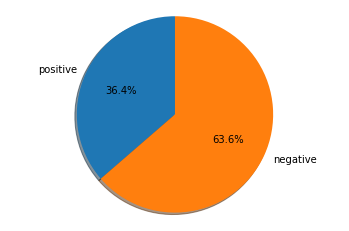

In [18]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'positive', 'negative'
sizes = [28, 49]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#### By money value:

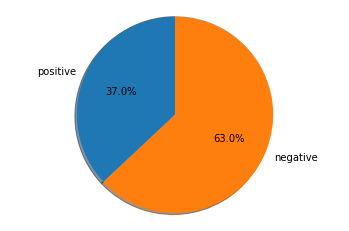

In [19]:
pos_tr_sums = neg_tr_sums = 0
for tr_type_, tr_sum_ in detect_sign.items():
    if tr_sum_ >= 0:
        pos_tr_sums += tr_sum_
    else:
        neg_tr_sums += abs(tr_sum_)

labels = 'positive', 'negative'
sizes = [pos_tr_sums, neg_tr_sums]        
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### Creating sum of all positive and sum of all negative amounts:

In [20]:
sums_of_negative = []
sums_of_positive = []

tr_type_column = df.to_numpy()[:, 4]
amount_column = df.to_numpy()[:, 1]
for i in range(len(df)):
    pos_positions = np.array([is_positive[x] for x in tr_type_column[i]])
    sums_of_negative += [np.sum(transform_inv(amount_column[i][pos_positions != True]))]
    sums_of_positive += [np.sum(transform_inv(amount_column[i][pos_positions]))]

In [21]:
print(len(sums_of_negative))
sums_of_negative

14160


[-34522837.56999999,
 -6169398.959999999,
 -16383969.399999997,
 -52274987.739999995,
 -959747.46,
 -2617015.639999999,
 -16507581.3,
 -4878076.779999999,
 -42267108.97999999,
 -11608006.519999998,
 -3843140.329999999,
 -3500214.4299999997,
 -14037427.929999998,
 -5013265.959999998,
 -199967431.55,
 -10968803.579999994,
 -10395545.829999998,
 -5501945.280000001,
 -5817000.949999999,
 -227600182.72,
 -4762464.740000001,
 -24607673.049999997,
 -780590.5000000002,
 -4500512.139999999,
 -6082000.27,
 -9373912.44,
 -6809460.669999998,
 -8485836.619999997,
 -6411078.969999999,
 -2618472.43,
 -165153870.06,
 -9787557.779999997,
 -5901727.629999999,
 -8137339.620000001,
 -120366011.72999999,
 -11337270.529999997,
 -25096651.71,
 -3853429.169999999,
 -46726007.999999985,
 -12010034.659999998,
 -5261407.22,
 -3354028.180000001,
 -24064210.43,
 -3011874.99,
 -17742815.95,
 -719542.2199999999,
 -6472560.01,
 -10189416.7,
 -19926440.029999997,
 -7073623.969999998,
 -14643957.11,
 -8606637.129999999

In [22]:
ddff = pd.read_csv('./transactions.csv')
ddff

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN
1,39026145,1 10:19:29,6011,7010,56147.89,NaN
2,39026145,1 10:20:56,4829,2330,-56147.89,NaN
3,39026145,1 10:39:54,5499,1010,-1392.47,NaN
4,39026145,2 15:33:42,5499,1010,-920.83,NaN
...,...,...,...,...,...,...
6849341,61870738,453 16:03:02,5499,1010,-5176.84,10217113
6849342,61870738,454 10:54:60,5411,1010,-1652.77,022915
6849343,61870738,454 14:23:59,5499,1010,-4687.23,10217113
6849344,61870738,454 16:11:53,5541,1110,-4491.83,RU570124


### Get transaction types distribution

#### By pieces:

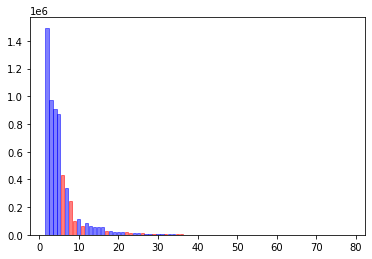

In [23]:
tr_count_pairs = dict(sorted(Counter(all_tr_types).items(), key = lambda x: x[1], reverse = True))

data_for_bars = dict(list(tr_count_pairs.items())[0:])

positive_items = []
negative_items = []
bar_list = plt.bar(data_for_bars.keys(), data_for_bars.values(), alpha=0.5)
for i, item in enumerate(data_for_bars.items()):
    if is_positive[item[0]]:
        positive_items += [item]
        bar_list[i].set_color('r')
    else:
        negative_items += [item]
        bar_list[i].set_color('b')
plt.show()

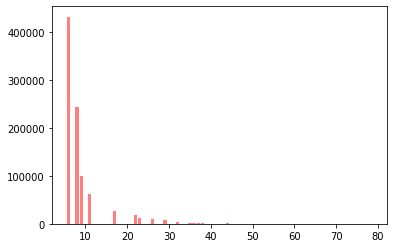

In [24]:
pos_items = dict(positive_items[0:])
bar_list = plt.bar(pos_items.keys(), pos_items.values(), color='r', alpha=0.5)

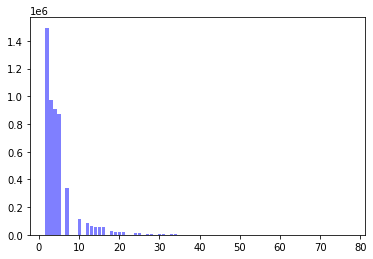

In [25]:
neg_items = dict(negative_items[0:])
bar_list = plt.bar(neg_items.keys(), neg_items.values(), color='b', alpha=0.5)

#### By money value:

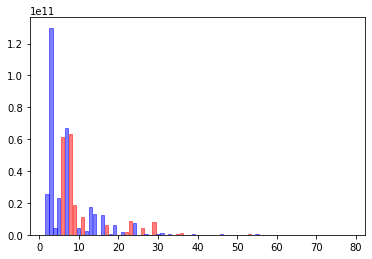

In [26]:
data_for_bars = dict(sorted(list(detect_sign.items())[0:], key = lambda x: abs(x[1]), reverse = True))

positive_items = []
negative_items = []
bar_list = plt.bar(data_for_bars.keys(), np.abs(list(data_for_bars.values())), alpha=0.5)
for i, item in enumerate(data_for_bars.items()):
    if item[1] >= 0:
        positive_items += [item]
        bar_list[i].set_color('r')
    else:
        negative_items += [item]
        bar_list[i].set_color('b')
plt.show()

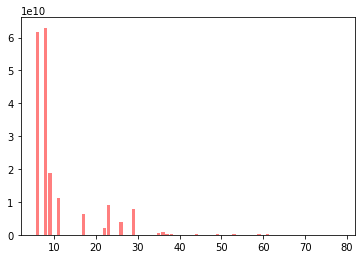

In [27]:
pos_items = dict(positive_items[0:])
bar_list = plt.bar(pos_items.keys(), pos_items.values(), color='r', alpha=0.5)

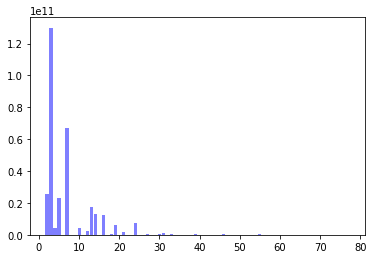

In [28]:
neg_items = dict(negative_items[0:])
bar_list = plt.bar(neg_items.keys(), np.abs(list(neg_items.values())), color='b', alpha=0.5)

In [29]:
data_for_bars

{3: -129944978421.37521,
 7: -67164942356.95911,
 8: 63019121548.25247,
 6: 61627808348.87884,
 2: -25303662899.325027,
 5: -23052864244.00218,
 9: 18723606282.798706,
 13: -17142971593.847689,
 14: -12857000297.198252,
 16: -12627316256.625439,
 11: 11057177844.249245,
 23: 8934697245.19987,
 29: 7954020181.620016,
 24: -7097741007.649924,
 17: 6415865493.779576,
 19: -5880297926.359434,
 10: -4366218208.109536,
 4: -4294191344.8755426,
 26: 3956157128.16986,
 12: -2404875743.12978,
 21: -2053891709.710005,
 22: 1996402362.2800028,
 36: 932550531.310001,
 31: -871947324.3999968,
 35: 642409717.4200008,
 27: -600159819.0900201,
 46: -582515088.0800003,
 53: 390544043.61999995,
 55: -345584410.08999974,
 39: -288610638.3399994,
 33: -288077554.78999835,
 30: -214531871.44000083,
 18: -190781620.8899613,
 44: 176924548.17999968,
 59: 151110059.93000004,
 49: 150251293.14999977,
 15: -115980297.92000102,
 37: 111881815.80000018,
 61: 110166161.16999988,
 38: 100433193.51999983,
 32: 83226

In [30]:
neg_items

{3: -129944978421.37521,
 7: -67164942356.95911,
 2: -25303662899.325027,
 5: -23052864244.00218,
 13: -17142971593.847689,
 14: -12857000297.198252,
 16: -12627316256.625439,
 24: -7097741007.649924,
 19: -5880297926.359434,
 10: -4366218208.109536,
 4: -4294191344.8755426,
 12: -2404875743.12978,
 21: -2053891709.710005,
 31: -871947324.3999968,
 27: -600159819.0900201,
 46: -582515088.0800003,
 55: -345584410.08999974,
 39: -288610638.3399994,
 33: -288077554.78999835,
 30: -214531871.44000083,
 18: -190781620.8899613,
 15: -115980297.92000102,
 67: -70483196.02999999,
 45: -55677412.97999978,
 20: -54306386.25000331,
 41: -31042136.22,
 40: -25053069.73000002,
 28: -22073292.250003215,
 58: -18692765.49999998,
 25: -15760450.499999948,
 69: -15384293.480000002,
 68: -13369983.549999999,
 34: -10471737.979999911,
 62: -10097861.92,
 72: -9040555.499999998,
 52: -4829478.440000006,
 51: -3483616.0500000045,
 43: -2701547.6799999974,
 42: -1450151.990000004,
 47: -1066667.7099999976,


In [31]:
pos_items

{8: 63019121548.25247,
 6: 61627808348.87884,
 9: 18723606282.798706,
 11: 11057177844.249245,
 23: 8934697245.19987,
 29: 7954020181.620016,
 17: 6415865493.779576,
 26: 3956157128.16986,
 22: 1996402362.2800028,
 36: 932550531.310001,
 35: 642409717.4200008,
 53: 390544043.61999995,
 44: 176924548.17999968,
 59: 151110059.93000004,
 49: 150251293.14999977,
 37: 111881815.80000018,
 61: 110166161.16999988,
 38: 100433193.51999983,
 32: 83226378.01000015,
 50: 78692846.08999991,
 54: 46254800.26999999,
 64: 37471409.22999998,
 70: 20296003.909999996,
 65: 15711213.940000005,
 57: 5139113.570000001,
 73: 3572794.7199999997,
 78: 224591.58000000002,
 74: 152430.30999999994}

### Create positive and negative `tr_type` columns:

In [32]:
old_tr_type_col = df.to_numpy()[:,4]

In [33]:
old_tr_type_col.shape

(14160,)

In [34]:
old_tr_type_col

array([array([ 8, 13,  6,  3,  3, 23,  3, 11,  8, 19, 20,  6,  2,  6,  3, 17, 13,
       11,  2,  5,  8, 13,  3, 13,  8,  8, 13,  9, 11,  2,  2,  2,  3,  5,
        2,  8, 13,  8,  3, 11, 11, 24,  3, 11, 11, 13,  3, 19, 20, 11, 13,
       24,  8, 19, 20,  8, 19, 20,  8, 20, 19,  2,  6, 17,  3, 11, 11,  6,
        6,  8, 20, 19, 11, 19, 20,  3,  6, 17,  3,  6, 17,  2,  3, 23,  3,
        3,  8, 13,  8, 13, 17,  2,  2,  2, 11,  3,  6,  2, 13,  8, 13,  8,
       13, 11,  8, 13,  2,  8, 13, 23,  3, 11, 23,  3, 11, 13,  8, 13,  9,
       13,  8, 13,  5,  5, 19, 20,  6,  9, 17,  3,  6,  7,  4,  2, 42, 33,
       13, 17,  7,  7,  7,  7], dtype=int32),
       array([29,  3,  5,  5,  3,  3,  3,  4,  3,  3,  4,  3,  3,  4, 29,  4,  5,
        3,  4,  4,  3,  3,  3,  3,  3,  3,  5,  5,  5,  2,  3,  3,  3,  4,
        4,  4,  4,  8,  3, 24,  2,  4,  4,  3,  4,  2,  2,  4, 29,  2,  2,
        3,  3,  2,  5,  3,  3,  3,  4,  3,  3,  3,  5,  4,  3,  3,  3,  4,
        5,  5,  3,  3,  4,  3,  4,  2,  

In [35]:
%%time

neg_tr_type = [np.array([], dtype=np.int32) for i in range(len(df))]
pos_tr_type = [np.array([], dtype=np.int32) for i in range(len(df))]

neg_tr_type_ix = [np.array([], dtype=np.int32) for i in range(len(df))]
pos_tr_type_ix = [np.array([], dtype=np.int32) for i in range(len(df))]

set_neg_types = set(list(neg_items.keys()))
set_pos_types = set(list(pos_items.keys()))
set_top_neg_types = set(list(neg_items.keys())[:15])
set_top_pos_types = set(list(pos_items.keys())[:15])

for i in range(len(df)):
    for ixx, el in enumerate(old_tr_type_col[i]):
        if el in set_top_neg_types:
            neg_tr_type[i] = np.append(neg_tr_type[i], el)
            neg_tr_type_ix[i] = np.append(neg_tr_type_ix[i], ixx)
        elif el in set_top_pos_types:
            pos_tr_type[i] = np.append(pos_tr_type[i], el)
            pos_tr_type_ix[i] = np.append(pos_tr_type_ix[i], ixx)

CPU times: user 1min 6s, sys: 133 ms, total: 1min 6s
Wall time: 1min 6s


In [36]:
set_top_neg_types

{2, 3, 4, 5, 7, 10, 12, 13, 14, 16, 19, 21, 24, 27, 31}

In [37]:
set_top_pos_types

{6, 8, 9, 11, 17, 22, 23, 26, 29, 35, 36, 44, 49, 53, 59}

In [38]:
set_neg_types

{2,
 3,
 4,
 5,
 7,
 10,
 12,
 13,
 14,
 15,
 16,
 18,
 19,
 20,
 21,
 24,
 25,
 27,
 28,
 30,
 31,
 33,
 34,
 39,
 40,
 41,
 42,
 43,
 45,
 46,
 47,
 48,
 51,
 52,
 55,
 56,
 58,
 60,
 62,
 63,
 66,
 67,
 68,
 69,
 71,
 72,
 75,
 76,
 77}

In [39]:
len(set_pos_types)

28

In [40]:
neg_tr_type = np.array(neg_tr_type, dtype=object)
print(neg_tr_type.shape)
pos_tr_type = np.array(pos_tr_type, dtype=object)
print(pos_tr_type.shape)

(14160,)
(14160,)


In [41]:
np.sum(amount_column[0])

-212.8691207118346

In [42]:
sums_of_negative[0]

-34522837.56999999

In [43]:
sums_of_positive[0]

34526463.18999999

In [44]:
pos_tr_type

array([array([ 8,  6, 23, 11,  8,  6,  6, 17, 11,  8,  8,  8,  9, 11,  8,  8, 11,
       11, 11, 11, 11,  8,  8,  8,  6, 17, 11, 11,  6,  6,  8, 11,  6, 17,
        6, 17, 23,  8,  8, 17, 11,  6,  8,  8, 11,  8,  8, 23, 11, 23, 11,
        8,  9,  8,  6,  9, 17,  6, 17], dtype=int32),
       array([29, 29,  8, 29, 29, 29, 29, 29, 29, 29, 29,  8, 29, 29, 29, 29,  8,
       29, 29,  8, 29, 29,  8], dtype=int32),
       array([9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 9, 8, 9, 9, 9], dtype=int32),
       ..., array([ 9,  9,  8, 23,  6,  8,  6,  6,  6], dtype=int32),
       array([8, 8, 8], dtype=int32),
       array([9, 9, 6, 9, 6, 6, 6, 9, 8, 8, 6, 8, 8, 8, 6, 6, 9, 8, 8, 6, 9, 8,
       8, 9, 6, 8, 8, 6, 8, 8, 6, 8, 8, 8, 9, 8, 9, 8, 8, 8], dtype=int32)],
      dtype=object)

In [45]:
neg_tr_type

array([array([13,  3,  3,  3, 19,  2,  3, 13,  2,  5, 13,  3, 13, 13,  2,  2,  2,
        3,  5,  2, 13,  3, 24,  3, 13,  3, 19, 13, 24, 19, 19, 19,  2,  3,
       19, 19,  3,  3,  2,  3,  3,  3, 13, 13,  2,  2,  2,  3,  2, 13, 13,
       13, 13,  2, 13,  3,  3, 13, 13, 13, 13,  5,  5, 19,  3,  7,  4,  2,
       13,  7,  7,  7,  7], dtype=int32),
       array([ 3,  5,  5,  3,  3,  3,  4,  3,  3,  4,  3,  3,  4,  4,  5,  3,  4,
        4,  3,  3,  3,  3,  3,  3,  5,  5,  5,  2,  3,  3,  3,  4,  4,  4,
        4,  3, 24,  2,  4,  4,  3,  4,  2,  2,  4,  2,  2,  3,  3,  2,  5,
        3,  3,  3,  4,  3,  3,  3,  5,  4,  3,  3,  3,  4,  5,  5,  3,  3,
        4,  3,  4,  2,  4,  4,  4,  3,  4,  4,  4,  4,  3,  4,  4,  4,  3,
        4,  4,  5,  5,  5,  3,  5,  3,  4,  3,  3,  2,  2,  4,  3,  3,  5,
        3,  2,  3,  2,  3,  3,  3,  4,  5,  3,  3,  3,  3,  4,  3,  3,  3,
        3,  3,  4,  3,  3,  3,  4,  3,  2,  2,  4,  3,  2,  3,  3,  2,  4,
        3,  3,  4,  4,  3,  3,  5,  4,  3,  

In [209]:
df_lightgbm = pd.read_pickle('agg_feat_embed.pickle')
print(len(df_lightgbm.columns))
df_lightgbm

907


customer_id    v000       v001          v002          v003  v004  v005  \
0        10915793  1170.0 -7190289.0  -6145.546387  2.884534e+04   0.0   0.0   
1        11882317    57.0 -4472764.0 -78469.546875  1.417221e+05   0.0   0.0   
2        14331004   982.0 -6448467.5  -6566.667480  1.355775e+06   0.0   0.0   
3        15058566   711.0 -9104038.0 -12804.553711  1.060423e+05   0.0   0.0   
4        15392798   358.0 -1384753.0  -3868.025146  7.765401e+03   0.0   0.0   
...           ...     ...        ...           ...           ...   ...   ...   
14995     8269375   116.0 -4307045.5 -37129.703125  6.568082e+04   0.0   0.0   
14996     8293832   816.0 -3729464.5  -4570.422363  2.982457e+05   0.0   0.0   
14997    86650997   603.0    62269.5    103.266167  3.391654e+04   0.0   0.0   
14998    90934286   881.0 -4966781.0  -5637.663086  1.600138e+04   0.0   0.0   
14999    98430195   440.0 -2227744.5  -5063.055664  2.262769e+04   0.0   0.0   

        v006   v007   v008   v009  v010   v011  v012  v013  v014  v015  v016  \
0      460.0    2.0   61.0  105.0   0.0   92.0  56.0   2.0  13.0  79.0   1.0   
1       48.0    2.0    4.0    0.0   1.0    0.0   0.0   0.0   1.0   0.0   0.0   
2      287.0  356.0    8.0    2.0  68.0   24.0  21.0   1.0  11.0   0.0   0.0   
3      115.0   76.0  138.0   52.0  63.0   76.0   0.0  39.0  51.0   0.0   0.0   
4       63.0    2.0   90.0  190.0   0.0    4.0   0.0   0.0   0.0   0.0   0.0   
...      ...    ...    ...    ...   ...    ...   ...   ...   ...   ...   ...   
14995   41.0   13.0    9.0   38.0   3.0    1.0   0.0   1.0   8.0   0.0   0.0   
14996  224.0   23.0   58.0  223.0  27.0  132.0  52.0  28.0   2.0   2.0   7.0   
14997  134.0  168.0  135.0   48.0  37.0   11.0   1.0   2.0   0.0   8.0  12.0   
14998  120.0    6.0   30.0  304.0   0.0  157.0  12.0  68.0   3.0   1.0   3.0   
14999  120.0   12.0  123.0  139.0  10.0    9.0   1.0   6.0   0.0   1.0   2.0   

       v017   v018  v019  v020  v021  v022   v023  v024  v025  v026  v027  \
0       5.0    5.0   0.0   0.0   0.0   0.0  257.0   0.0   0.0   1.0   0.0   
1       0.0    0.0   0.0   0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   
2       0.0  168.0   0.0   0.0   0.0   1.0    4.0  12.0   3.0   1.0   0.0   
3      17.0   31.0   0.0   2.0   0.0   6.0    0.0   2.0   1.0   0.0   0.0   
4       3.0    2.0   0.0   0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   
...     ...    ...   ...   ...   ...   ...    ...   ...   ...   ...   ...   
14995   1.0    0.0   0.0   0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   
14996   0.0    4.0   0.0   6.0   3.0   3.0    1.0   5.0   0.0   0.0   0.0   
14997   3.0    2.0   1.0   6.0   0.0   1.0    0.0   0.0   0.0   0.0   0.0   
14998  24.0    0.0   2.0  57.0   0.0   3.0    0.0   7.0   0.0   9.0   0.0   
14999   6.0    0.0   0.0   1.0   0.0   1.0    0.0   0.0   0.0   2.0   0.0   

       v028  v029  v030  v031  v032  v033  v034  v035  v036  v037  v038  v039  \
0       0.0   0.0   9.0   0.0   0.0   0.0   0.0   2.0   0.0   3.0   0.0   0.0   
1       1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2       0.0   0.0   5.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   
3       2.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   2.0   
4       1.0   0.0   0.0   0.0   1.0   0.0   0.0   2.0   0.0   0.0   0.0   0.0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
14995   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   
14996   0.0   0.0   0.0   1.0   0.0   1.0   0.0   0.0   3.0   0.0   0.0   0.0   
14997   0.0  17.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   
14998  10.0   2.0   0.0   0.0   0.0   0.0   2.0   7.0  15.0  14.0   0.0   0.0   
14999   0.0   0.0   0.0   0.0   0.0   0.0   3.0   0.0   0.0   1.0   0.0   0.0   

       v040  v041  v042  v043  v044  v045  v046  v047  v048  v049  v050  v051  \
0       0.0   1.0   3.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1       0.0   0.0   0.0 

In [210]:
!ls

'Distribution targets.ipynb'		    test_trx.parquet
 agg_feat_embed.pickle			    tr_mcc_codes.csv
 gender_test_kaggle_sample_submission.csv   tr_types.csv
 gender_train.csv			    train_trx.parquet
 gender_train_distribution_target.csv	    trans-gender-2019.zip
 test_ids.csv				    transactions.csv


In [211]:
np.sum(df_lightgbm['v902'].to_numpy())

0.0

In [212]:
useless_columns = []

for col in df_lightgbm.columns:
    if np.sum(df_lightgbm[col].to_numpy()) == 0:
        useless_columns += [col]

In [213]:
len(useless_columns)

121

In [214]:
import lightgbm as lgbm

In [215]:
model = lgbm.LGBMClassifier(n_estimators=500, boosting_type='gbdt', objective='binary', metric='auc', subsample=0.5,
                            subsample_freq=1, learning_rate=0.02, feature_fraction=0.75, max_depth=6, lambda_l1=1,
                            lambda_l2=1, min_data_in_leaf=50, random_state=42, n_jobs=8, reg_alpha=0, reg_lambda=0,
                            colsample_bytree=0, min_child_samples=0)

In [2]:
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import OneHotEncoder
import xgboost as xgb
import lightgbm as lgb

In [23]:
#custom loss function
def logregobj(preds, train_data):
    print(preds)
    print()
    print(dir(train_data))
    print(type(preds))
    labels = train_data.get_label()
    print(type(labels))
    print(labels)
    return
    preds=np.reshape(preds, (len(labels), 3))
    labels = OneHotEncoder(n_values=3, sparse=False).fit_transform(labels.reshape(-1, 1))
    grad = (preds - labels)
    hess = 2.0 * preds * (1.0-preds)
    return grad.flatten(), hess.flatten()

In [4]:
# Iris dataset
iris = datasets.load_iris()
X, Ymc = iris.data, iris.target
Y = OneHotEncoder(sparse=False).fit_transform(Ymc.reshape(-1, 1))

In [19]:
#train lightgbm with default multiclass loss function
params={'num_class':len(np.unique(Ymc)), 'objective': 'multiclass', 'verbose':1, 'num_leaves': 63, 'num_iterations': 10, 'silent':1}
lgb_train = lgb.Dataset(X, Ymc)
bst=lgb.train(params, lgb_train, verbose_eval=False)
preds=bst.predict(X)
pred_labels=np.argmax(preds, axis=1)
train_error=np.sum(pred_labels==Ymc)
#accuracy
print('lightgbm train correct %:', train_error/Ymc.shape[0])

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.083279 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 98
[LightGBM] [Info] Number of data points in the train set: 150, number of used features: 4
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightG

In [24]:
#train lightgbm with custom loss function
params={'num_class':len(np.unique(Ymc)), 'objective': 'multiclass', 'verbose':1, 'num_leaves': 63, 'num_iterations': 10, 'silent':1}
lgb_train = lgb.Dataset(X, Ymc)
bst=lgb.train(params, lgb_train, verbose_eval=False, fobj=logregobj)
preds=bst.predict(X)
pred_labels=np.argmax(preds, axis=1)
train_error=np.sum(pred_labels==Ymc)
#accuracy
print('lightgbm custom loss train correct %:', train_error/Ymc.shape[0])

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Using self-defined objective function
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.066362 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 98
[LightGBM] [Info] Number of data points in the train set: 150, number of used features: 4
[LightGBM] [Warning] Using self-defined objective function
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

TypeError: cannot unpack non-iterable NoneType object

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import OneHotEncoder
import xgboost as xgb
import lightgbm as lgb

#custom loss function
def logregobj(preds, train_data):
    labels = train_data.get_label()
    preds=np.reshape(preds, (len(labels), 3))
    labels = OneHotEncoder(n_values=3, sparse=False).fit_transform(labels.reshape(-1, 1))
    grad = (preds - labels)
    hess = 2.0 * preds * (1.0-preds)
    return grad.flatten(), hess.flatten()

# Iris dataset
iris = datasets.load_iris()
X, Ymc = iris.data, iris.target
Y = OneHotEncoder(sparse=False).fit_transform(Ymc.reshape(-1, 1))

#train lightgbm with default multiclass loss function
params={'num_class':len(np.unique(Ymc)), 'objective': 'multiclass', 'verbose':1, 'num_leaves': 63, 'num_iterations': 10, 'silent':1}
lgb_train = lgb.Dataset(X, Ymc)
bst=lgb.train(params, lgb_train, verbose_eval=False)
preds=bst.predict(X)
pred_labels=np.argmax(preds, axis=1)
train_error=np.sum(pred_labels==Ymc)
#accuracy
print('lightgbm train correct %:', train_error/Ymc.shape[0])

#train lightgbm with custom loss function
params={'num_class':len(np.unique(Ymc)), 'objective': 'multiclass', 'verbose':1, 'num_leaves': 63, 'num_iterations': 10, 'silent':1}
lgb_train = lgb.Dataset(X, Ymc)
bst=lgb.train(params, lgb_train, verbose_eval=False, fobj=logregobj)
preds=bst.predict(X)
pred_labels=np.argmax(preds, axis=1)
train_error=np.sum(pred_labels==Ymc)
#accuracy
print('lightgbm custom loss train correct %:', train_error/Ymc.shape[0])

#train xgboost with same custom loss function
dtrain = xgb.DMatrix(X, label=Ymc)
param = {'max_depth': '6', 'objective':'multi:softprob', 'num_class':len(np.unique(Ymc)), 'tree_method':'hist', 'silent':1}
model = xgb.Booster(params, [dtrain])
bst = xgb.train(param, dtrain, num_boost_round=10, obj=logregobj)
preds=bst.predict(dtrain)
pred_labels=np.argmax(preds, axis=1)
train_error=np.sum(pred_labels==Ymc)
#accuracy
print('xgboost custom loss train error %:', train_error/Ymc.shape[0])